# BOOM BIKE ASSIGNMENT

# SUBMITTED BY: DR RANJEET SINGH MAHLA

BUSINESS OBJECTIVES/GOALS

### The steps to be followed in this exercise are as follows:

1) Reading, understanding and visualizing the data

2) Preparing the data for model training (train-test split, rescaling)

3) Training the model

4) Residual analysis

5) Prediction and evaluation of the test set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

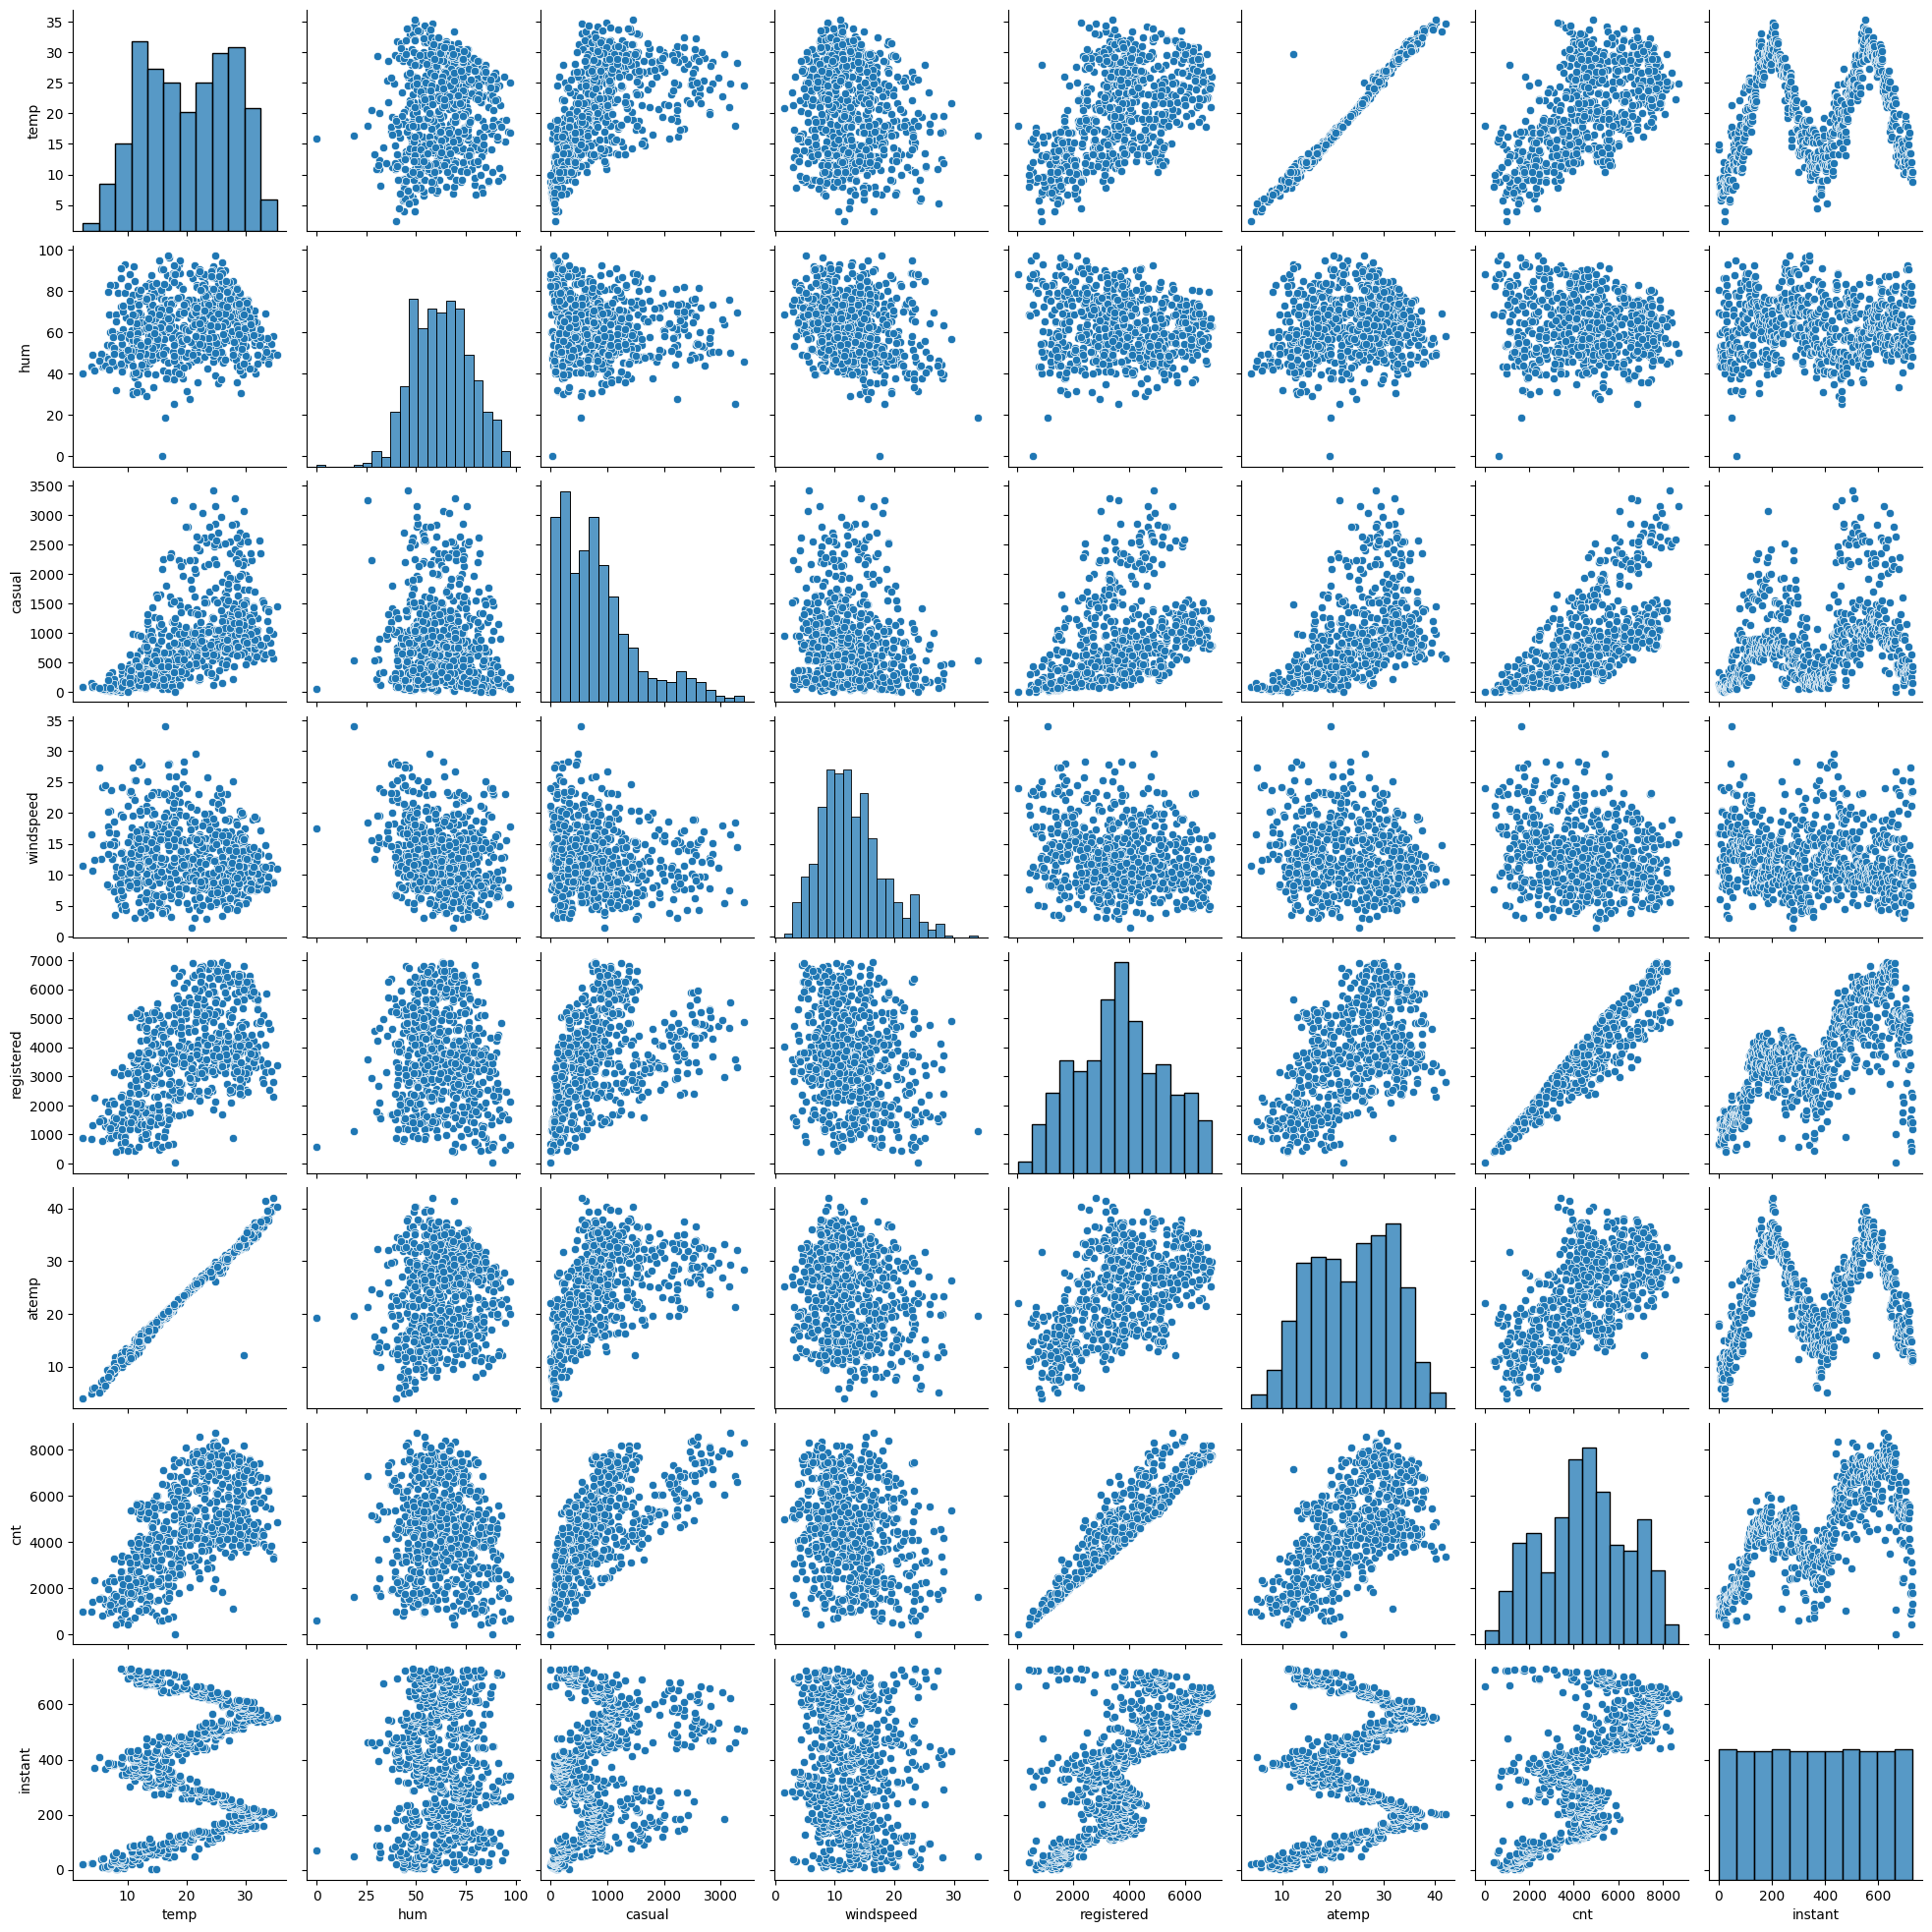

In [8]:
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [9]:
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })


In [10]:
df.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Sat           0   
1        2  02-01-2018  spring   0  Jan        0     Sun           0   
2        3  03-01-2018  spring   0  Jan        0     Mon           1   
3        4  04-01-2018  spring   0  Jan        0     Tue           1   
4        5  05-01-2018  spring   0  Jan        0     Wed           1   

      weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1  Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2          Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3          Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4          Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

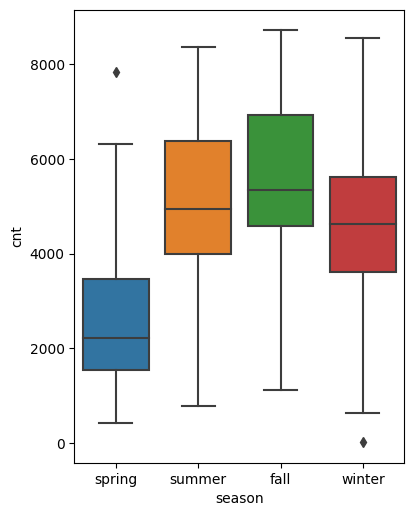

In [11]:
plt.figure(figsize=(40, 20))
plt.subplot(3, 8, 2)
sns.boxplot(x='season', y='cnt', data=df)
plt.show()

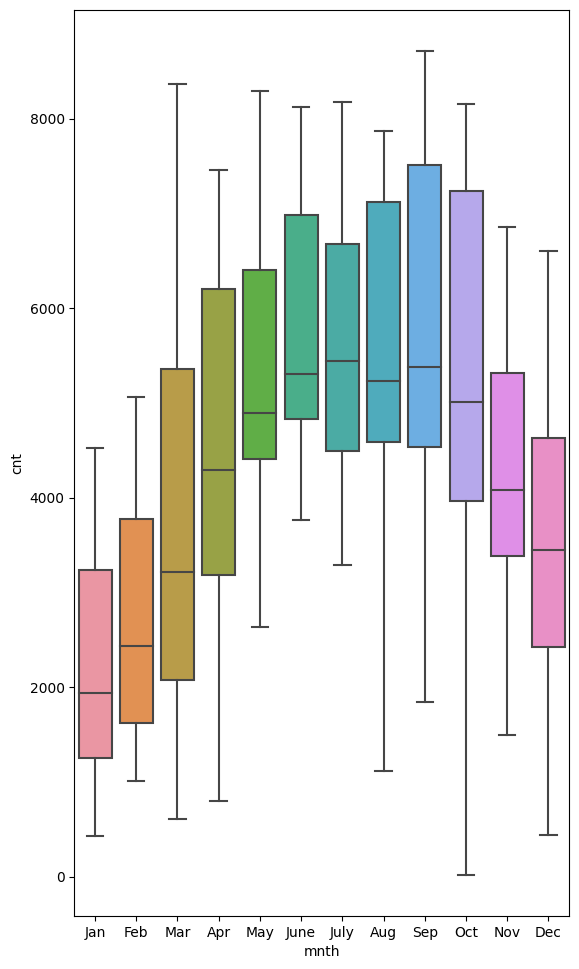

In [12]:
plt.figure(figsize=(60, 40))
plt.subplot(3, 8, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.show()

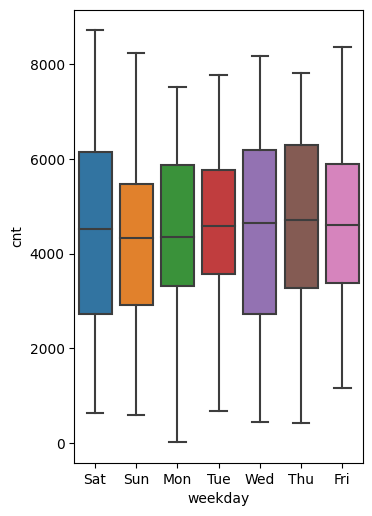

In [13]:
plt.figure(figsize=(35, 20))
plt.subplot(3, 8, 2)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.show()

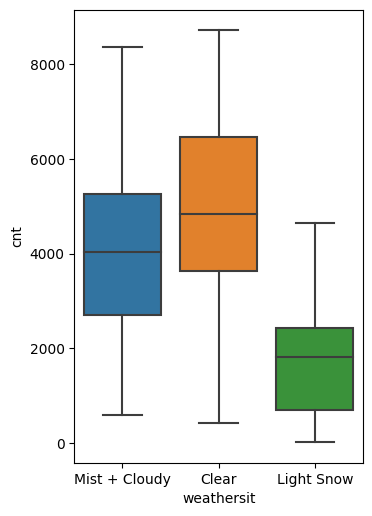

In [14]:
plt.figure(figsize=(35, 20))
plt.subplot(3, 8, 2)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

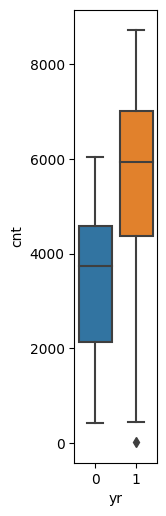

In [15]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 8, 2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

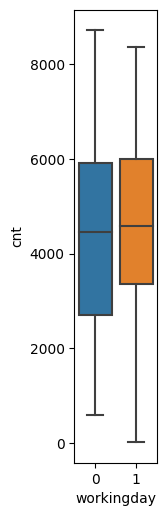

In [16]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 8, 2)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.show()

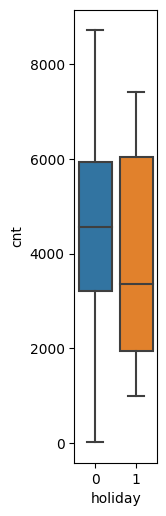

In [17]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 8, 2)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

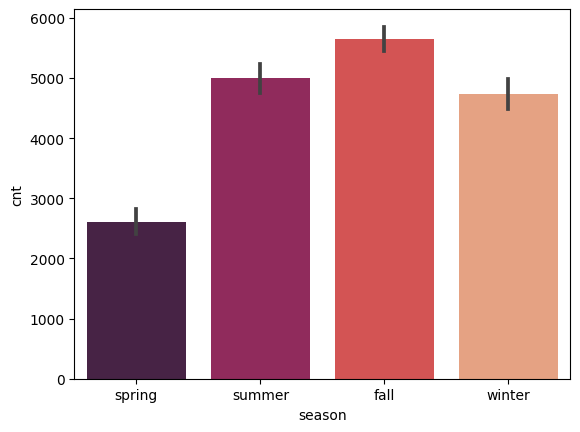

In [18]:
sns.barplot('season','cnt',data=df,palette="rocket",)
plt.show()

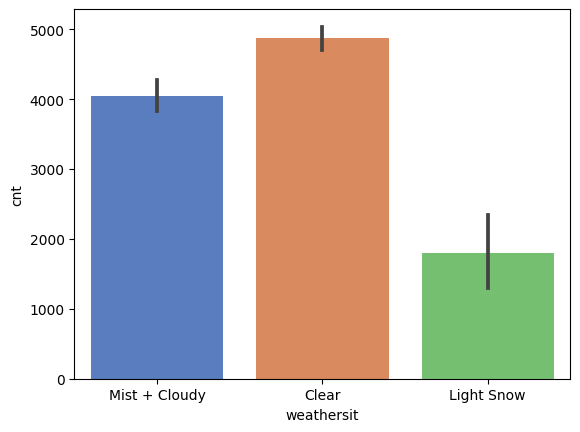

In [19]:
sns.barplot('weathersit','cnt',palette="muted",data=df)
plt.show()

CORRELATION BETWEEN DIFFERENT VARIABES
HEATMAP

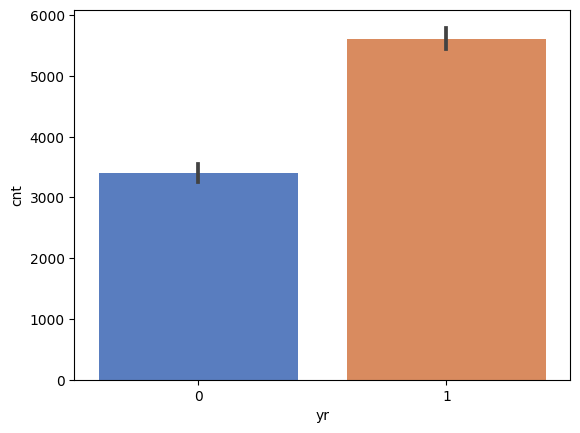

In [20]:
sns.barplot('yr','cnt',palette="muted",data=df)
plt.show()

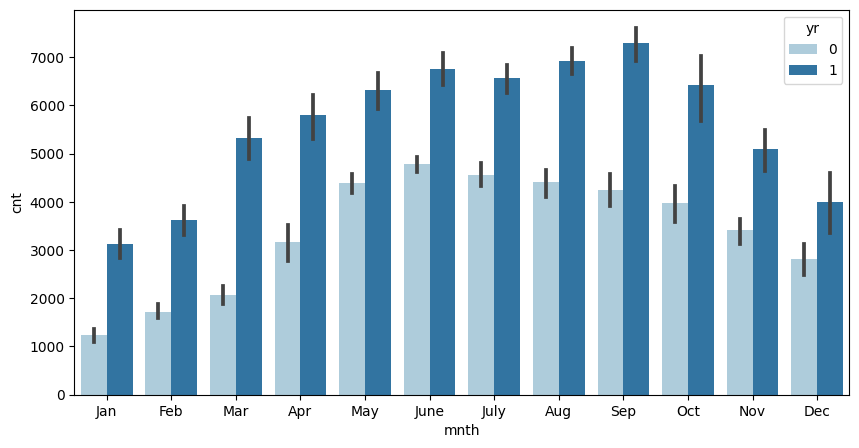

In [21]:
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=df,palette='Paired')
plt.show()

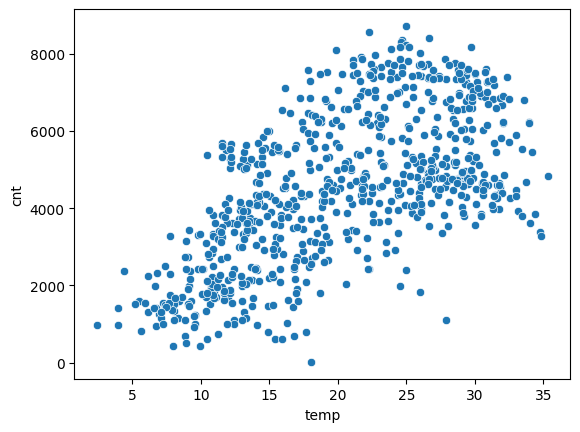

In [22]:
sns.scatterplot(x='temp',y='cnt' ,data=df)
plt.show()

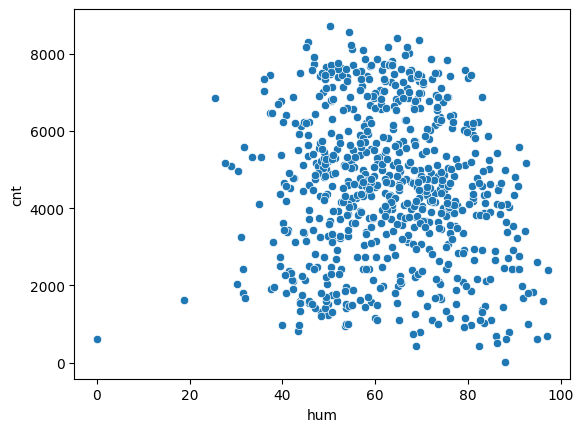

In [23]:
sns.scatterplot(x='hum',y='cnt' ,data=df)
plt.show()

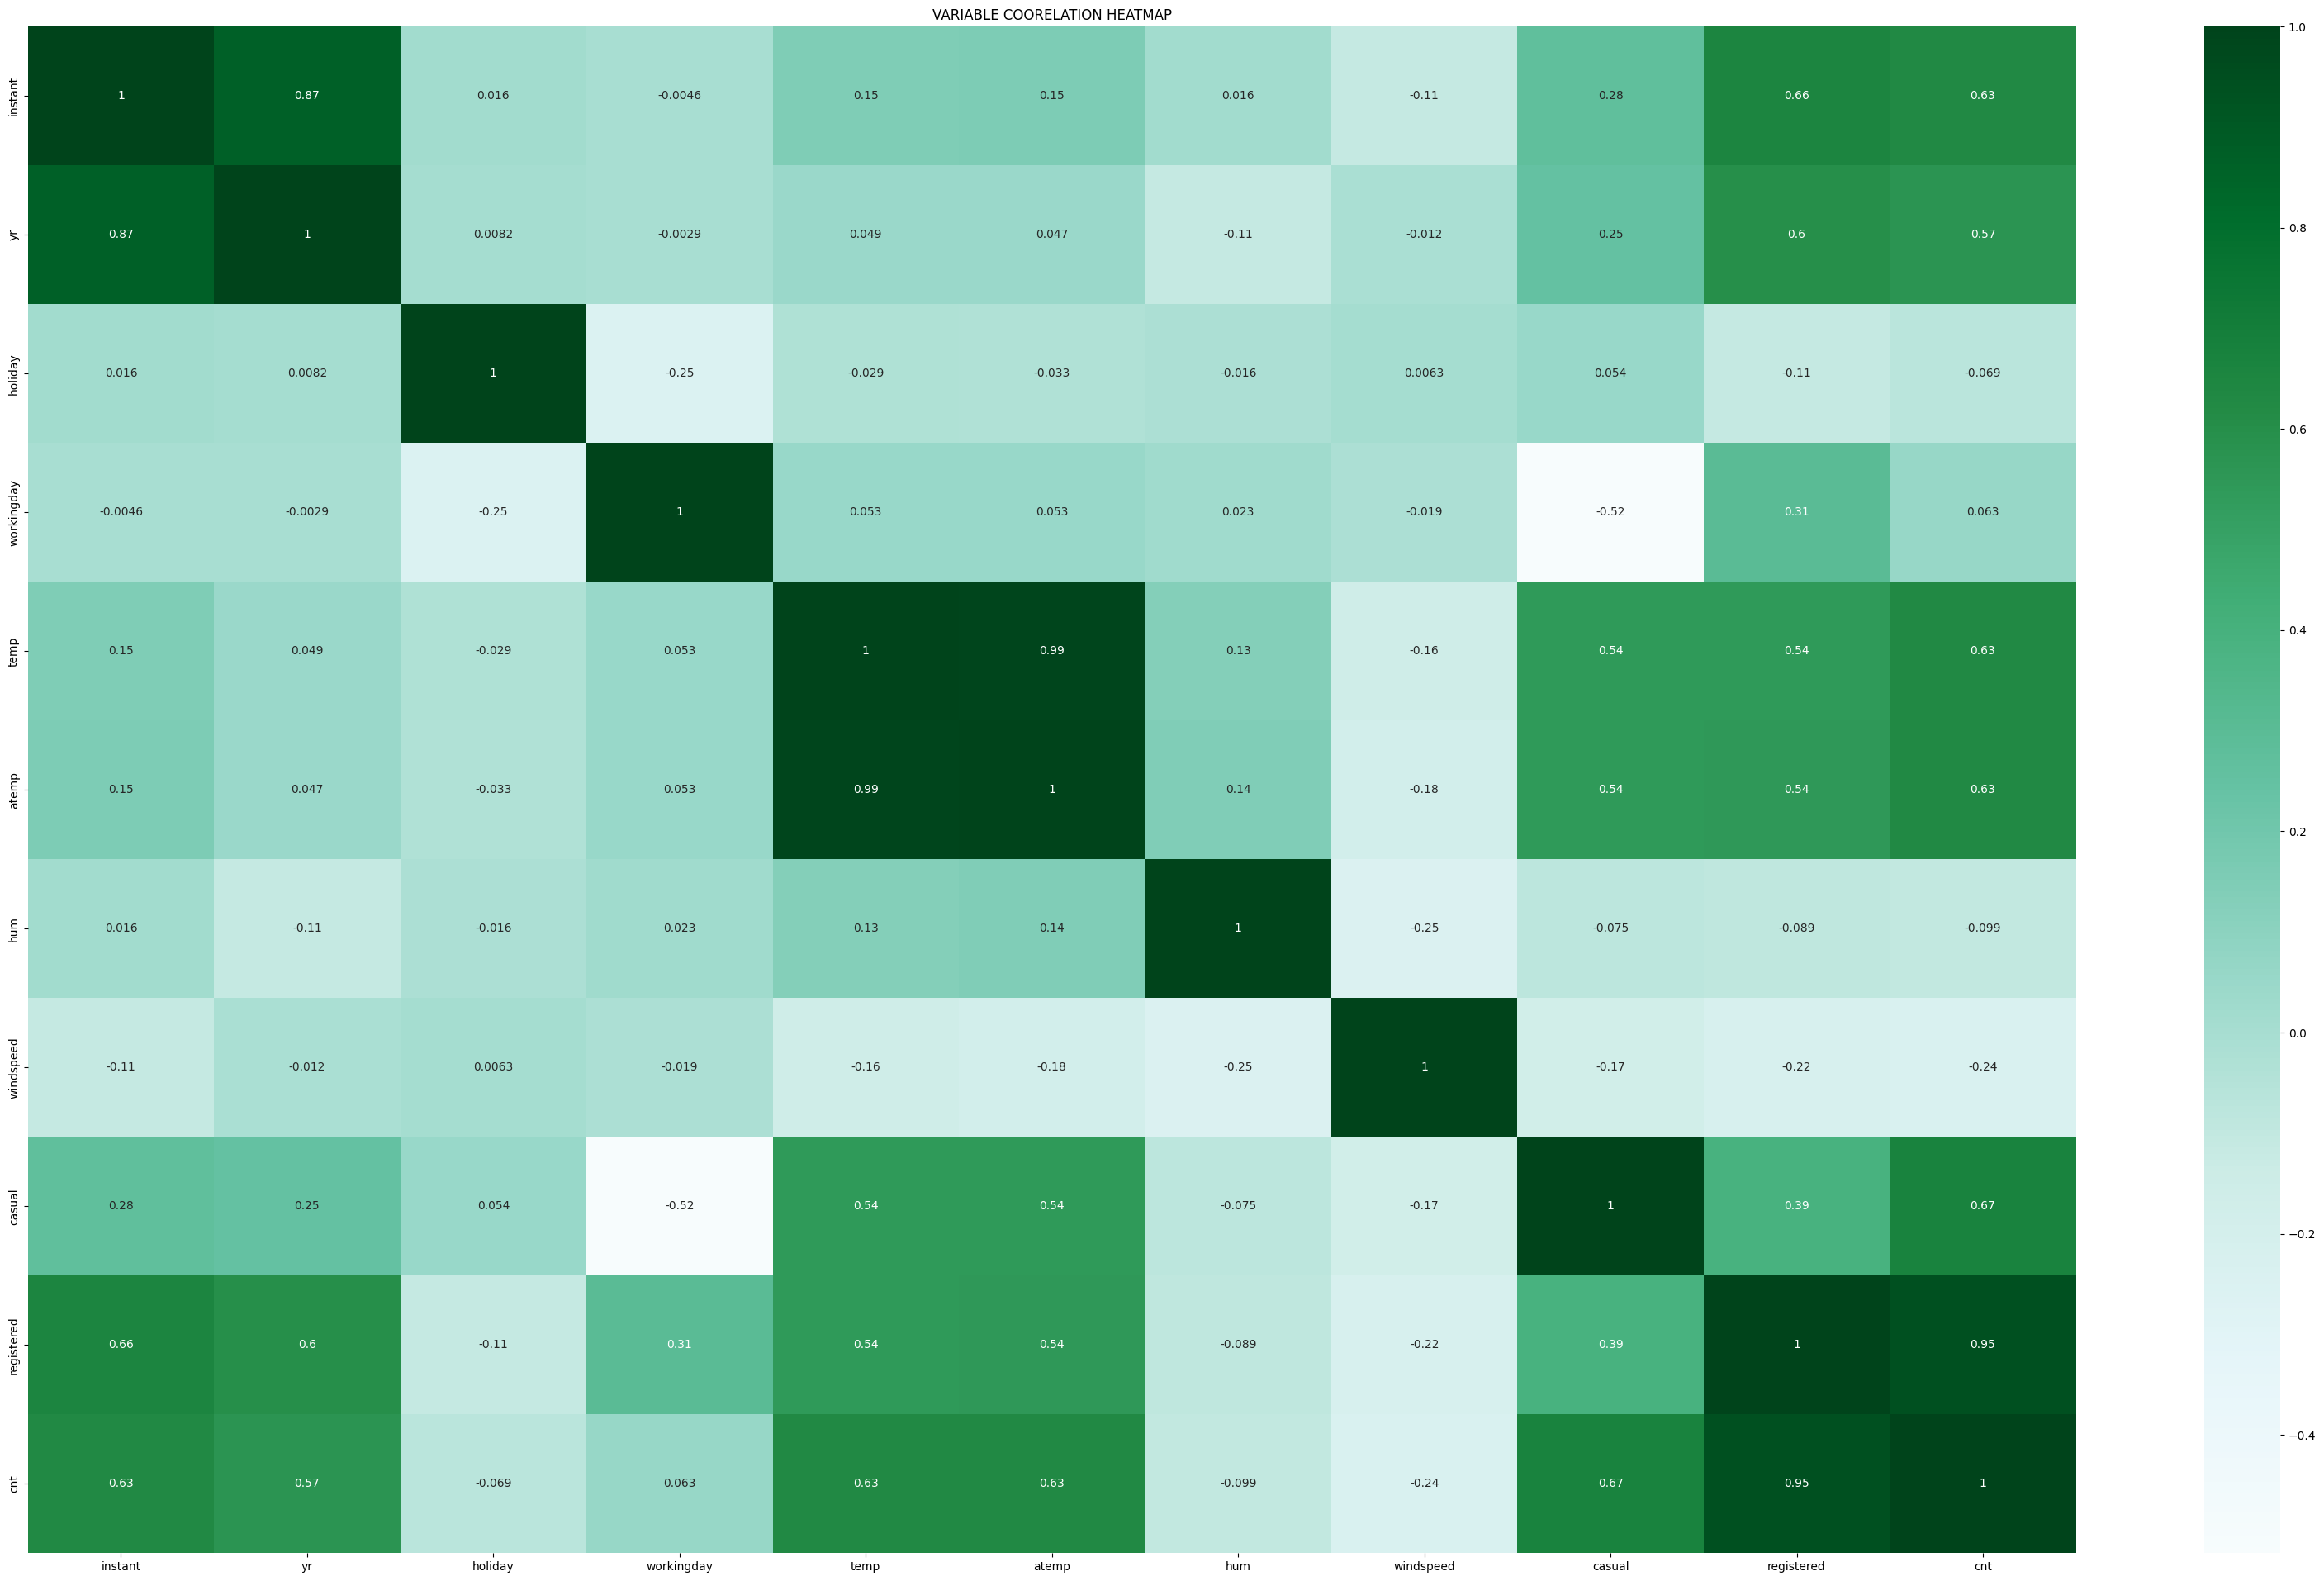

In [24]:
plt.figure(figsize=(40, 24))
sns.heatmap(df.corr(), cmap='BuGn', annot=True)
plt.title('VARIABLE COORELATION HEATMAP')
plt.show()

### INFERENCE




0. cnt find coorelation with 
1. registered
2. casual
3. temp
4. atemp
5. yr
6. workingday

In [25]:
dfC = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)

In [26]:
dfC.shape

(730, 11)

VIEW TOP ROWS

In [27]:
dfC.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [28]:
dfC.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

In [29]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [30]:
dfC.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

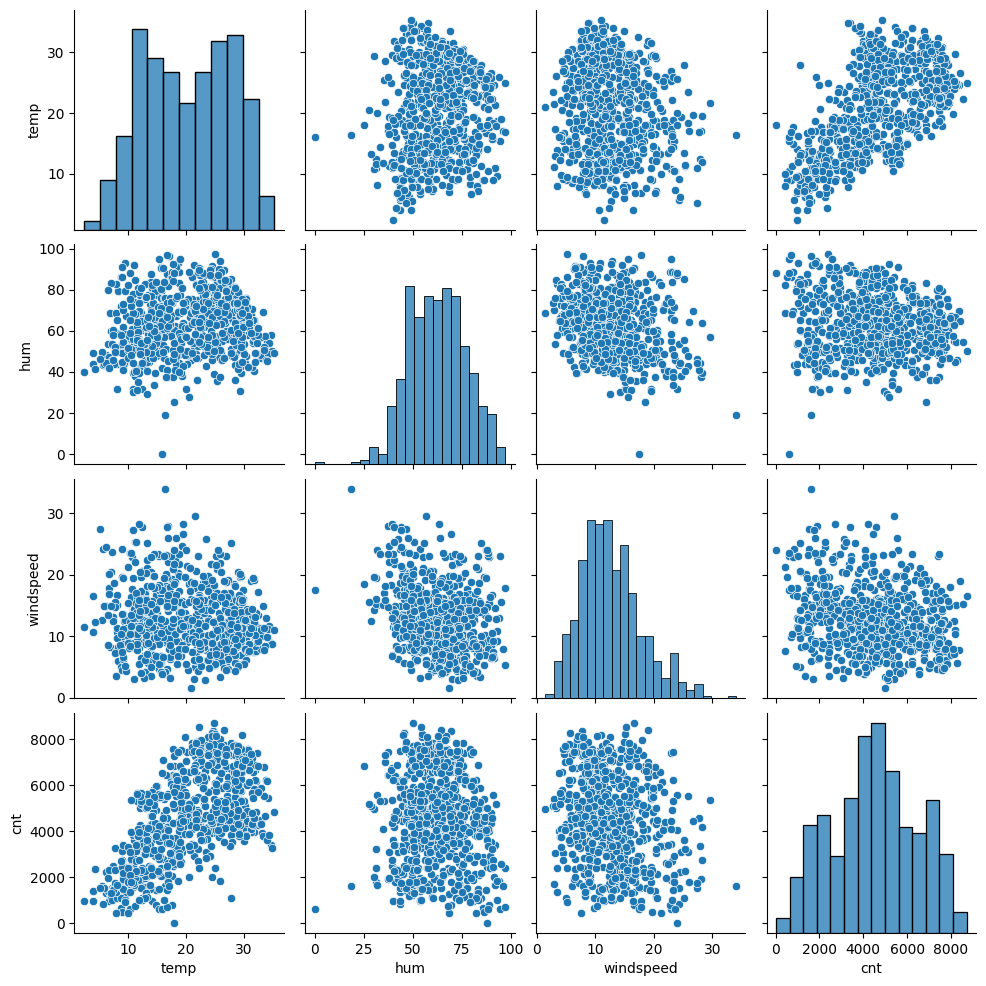

In [31]:
sns.pairplot(dfC, vars=["temp", "hum",'windspeed','cnt'])
plt.show()

In [32]:
month = pd.get_dummies(dfC.mnth, drop_first=True)
weekday = pd.get_dummies(dfC.weekday, drop_first=True)
weathersit = pd.get_dummies(dfC.weathersit, drop_first=True)
season = pd.get_dummies(dfC.season, drop_first=True)

###  INSERTING/ADDING DYUMMY VARIABLES TO DATASET dfC

In [33]:
dfD = pd.concat([dfC,month, weekday, weathersit, season], axis=1)
dfD.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

       hum  windspeed  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  \
0  80.5833  10.749882  ...    1    0    0    0    0           0   
1  69.6087  16.652113  ...    0    1    0    0    0           0   
2  43.7273  16.636703  ...    0    0    0    0    0           0   
3  59.0435  10.739832  ...    0    0    0    1    0           0   
4  43.6957  12.522300  ...    0    0    0    0    1           0   

   Mist + Cloudy  spring  summer  winter  
0              1       1       0       0  
1              1       1       0       0  
2              0       1       0       0  
3              0       1       0       0  
4              0       1       0       0  

[5 rows x 33 columns]

### REMOVING THE ORIGINAL VARIABLES FOR WHICH DUMMY VARIABLES ARE CREATED

In [34]:
dfD.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
dfD.head(10)

yr  holiday  workingday       temp      hum  windspeed   cnt  Aug  Dec  \
0   0        0           0  14.110847  80.5833  10.749882   985    0    0   
1   0        0           0  14.902598  69.6087  16.652113   801    0    0   
2   0        0           1   8.050924  43.7273  16.636703  1349    0    0   
3   0        0           1   8.200000  59.0435  10.739832  1562    0    0   
4   0        0           1   9.305237  43.6957  12.522300  1600    0    0   
5   0        0           1   8.378268  51.8261   6.000868  1606    0    0   
6   0        0           1   8.057402  49.8696  11.304642  1510    0    0   
7   0        0           0   6.765000  53.5833  17.875868   959    0    0   
8   0        0           0   5.671653  43.4167  24.250650   822    0    0   
9   0        0           1   6.184153  48.2917  14.958889  1321    0    0   

   Feb  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
0    0  ...    1    0    0    0    0           0              1       1   
1    0  ...    0    1    0    0    0           0              1       1   
2    0  ...    0    0    0    0    0           0              0       1   
3    0  ...    0    0    0    1    0           0              0       1   
4    0  ...    0    0    0    0    1           0              0       1   
5    0  ...    0    0    1    0    0           0              0       1   
6    0  ...    0    0    0    0    0           0              1       1   
7    0  ...    1    0    0    0    0           0              1       1   
8    0  ...    0    1    0    0    0           0              0       1   
9    0  ...    0    0    0    0    0           0              0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  
5       0       0  
6       0       0  
7       0       0  
8       0       0  
9       0       0  

[10 rows x 29 columns]

### DATASET INFORMATION


In [35]:
dfD.shape

(730, 29)

In [36]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

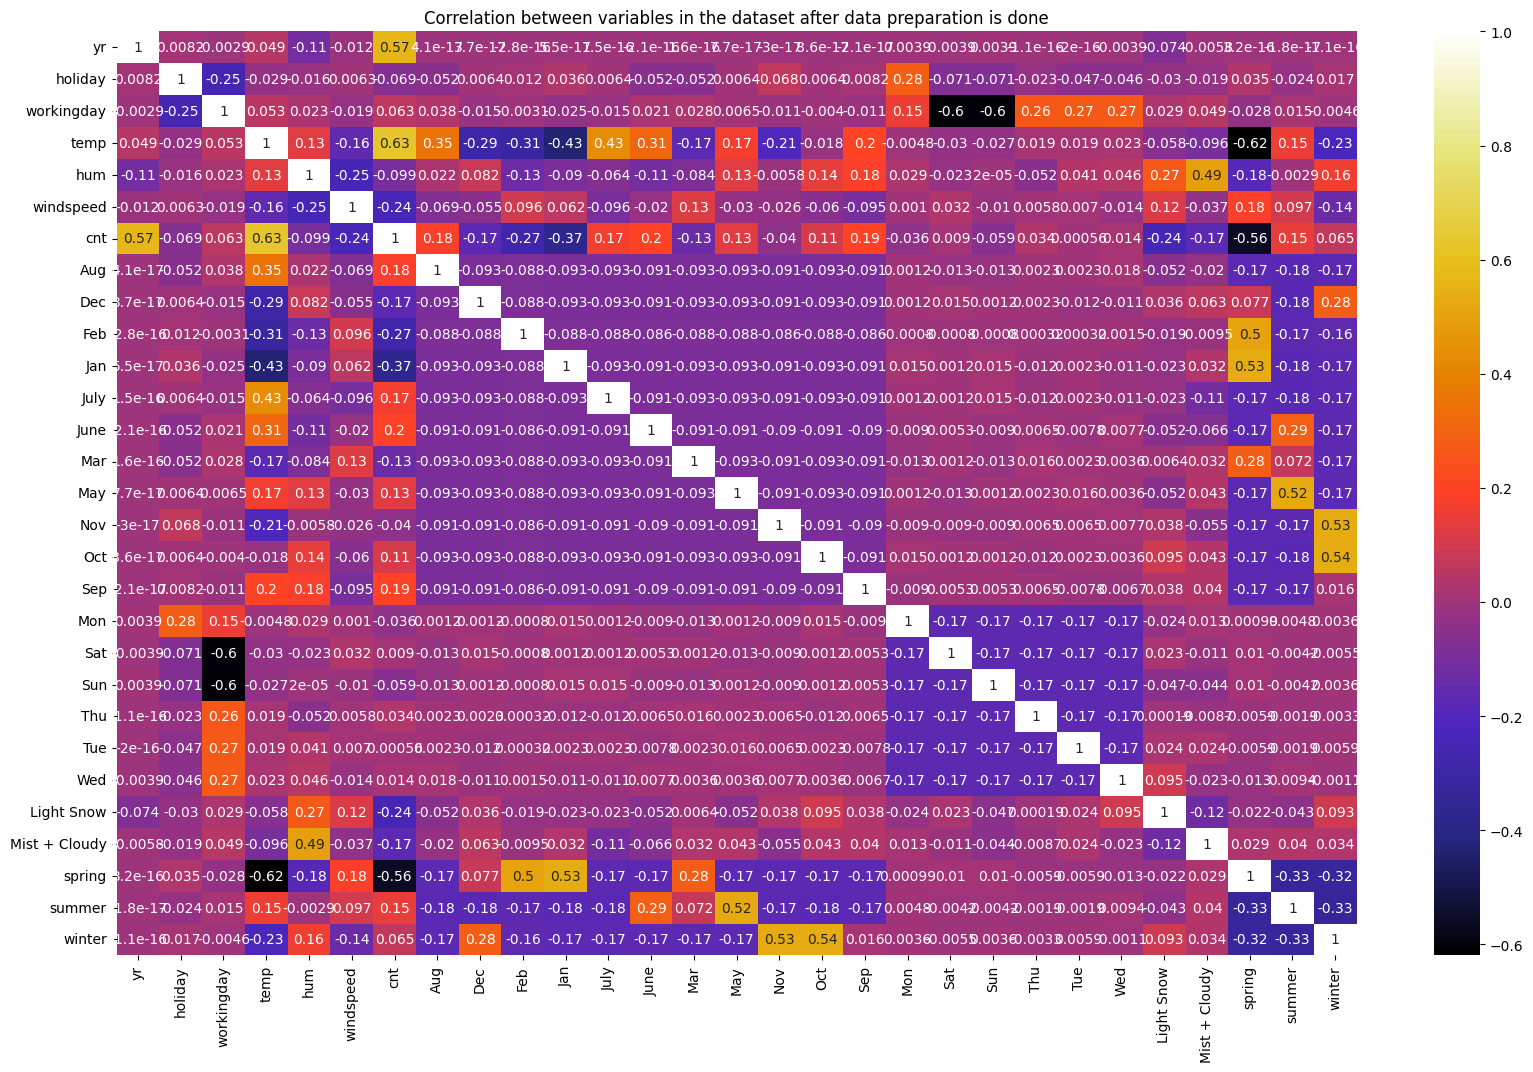

In [37]:
plt.figure(figsize=(20, 12))
sns.heatmap(dfD.corr(), cmap='CMRmap', annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

#  [[2]] PREPERATION OF DATA FOR MODEL TRAINING


### SPLITING DATA INTO TEST AND TRAIN

In [38]:
df_train, df_test = train_test_split(dfD, train_size=0.8, random_state=100)

In [39]:
df_train.shape

(584, 29)

In [40]:
df_test.shape

(146, 29)

### SCALING THE VARIABLES IN TRAIN AND TEST DATASETS

In [41]:
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [42]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.513699    0.027397    0.667808    0.537414    0.649499    0.319463   
std      0.500241    0.163378    0.471403    0.225336    0.144219    0.168114   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.340113    0.535852    0.199177   
50%      1.000000    0.000000    1.000000    0.545191    0.653714    0.294764   
75%      1.000000    0.000000    1.000000    0.736512    0.752361    0.410413   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  584.000000  584.000000  584.000000  584.000000  ...  584.000000   
mean     0.515792    0.090753    0.087329    0.073630  ...    0.150685   
std      0.225336    0.287504    0.282558    0.261392  ...    0.358048   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.350696    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.522837    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.691872    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow  \
count  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.154110    0.135274    0.133562    0.154110    0.027397   
std      0.361363    0.342309    0.340472    0.361363    0.163378   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy      spring      summer      winter  
count     584.000000  584.000000  584.000000  584.000000  
mean        0.342466    0.251712    0.246575    0.250000  
std         0.474941    0.434369    0.431387    0.433384  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    1.000000    0.000000    0.250000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

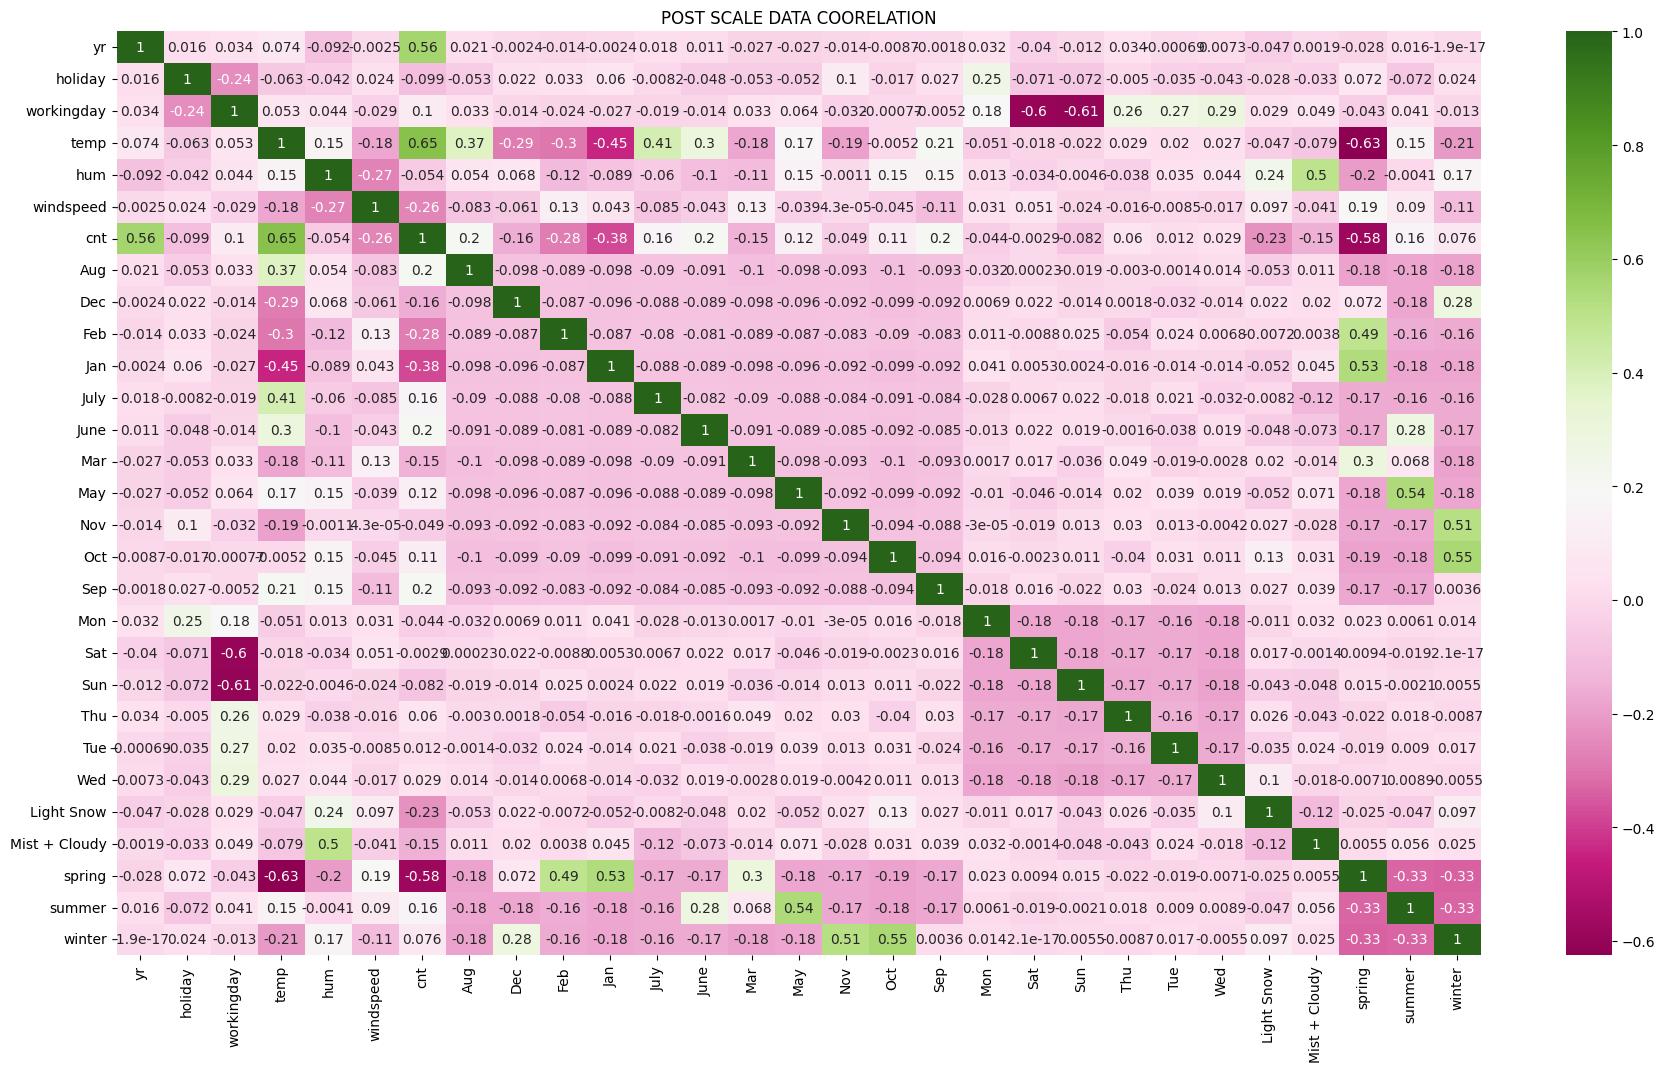

In [43]:
plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="PiYG", annot=True)
plt.title('POST SCALE DATA COORELATION')
plt.show()

INFERENCE
count coorrelate with temp

### PAIR PLOTS

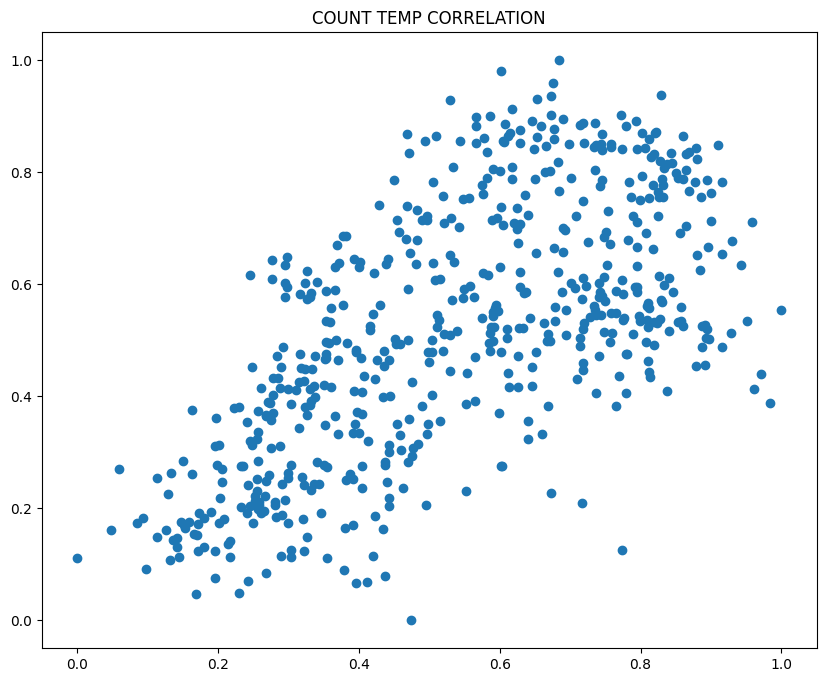

In [44]:
plt.figure(figsize=[10,8])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('COUNT TEMP CORRELATION')
plt.show()

# [[3]] MODEL CREATION

model variable = temp
PREPERATION OF VARIABLE temp for model building

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
y_train.head(5)

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: cnt, dtype: float64

In [47]:
X_train.head(5)

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
367   1        0           1  0.113228  0.454701   0.695175    0    0    0   
648   1        0           1  0.468352  0.477458   0.299450    0    0    0   
44    0        0           1  0.443431  0.387290   0.807474    0    0    1   
705   1        0           1  0.326094  0.787463   0.189819    0    1    0   
379   1        0           0  0.133996  0.431945   0.449210    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
367    1  ...    0    0    0    1    0           0              0       1   
648    0  ...    0    0    1    0    0           0              0       0   
44     0  ...    0    0    0    0    0           0              0       1   
705    0  ...    0    0    0    0    0           0              1       0   
379    1  ...    0    1    0    0    0           0              0       1   

     summer  winter  
367       0       0  
648       0       1  
44        0       0  
705       0       1  
379       0       0  

[5 rows x 28 columns]

## ONE VARIABLE MODEL
ADDING CONSTANT/INTERCEPT 

In [48]:
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train, X_train_sm)

In [49]:
lr_model = lr.fit()

In [50]:
lr_model.params

const    0.167419
temp     0.648239
dtype: float64

In [51]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     421.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           6.57e-71
Time:                        12:12:53   Log-Likelihood:                 201.26
No. Observations:                 584   AIC:                            -398.5
Df Residuals:                     582   BIC:                            -389.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1674      0.018      9.104      0.000       0.131       0.204
temp           0.6482      0.032     20.538      0.000       0.586       0.710
==============================================================================
Omnibus:                        9.280   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.317
Skew:                           0.111   Prob(JB):                       0.0425
Kurtosis:                       2.542   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

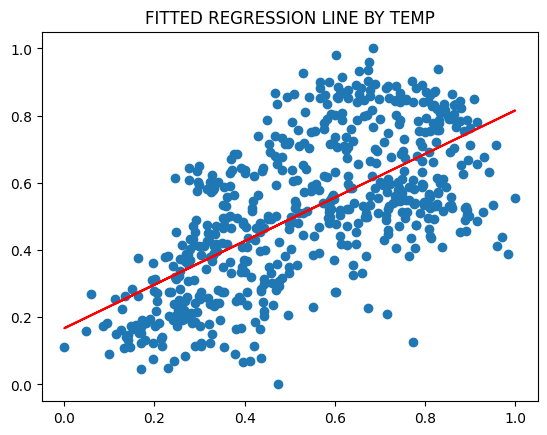

In [52]:
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1674 + 0.6482*X_train_sm.iloc[:, 1], 'r')
plt.title('FITTED REGRESSION LINE BY TEMP')
plt.show()

## TWO VARIABLE MODEL
R-squared can be improvised with addition of other variable
here the two variable for mdoel building are 
1. temp
2. yr 

In [53]:
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

In [54]:
lr = sm.OLS(y_train, X_train_sm)

In [55]:
lr_model = lr.fit()

In [56]:
lr_model.params

const    0.068300
temp     0.609811
yr       0.233154
dtype: float64

In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     636.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.97e-147
Time:                        12:12:53   Log-Likelihood:                 380.94
No. Observations:                 584   AIC:                            -755.9
Df Residuals:                     581   BIC:                            -742.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0683      0.014      4.794      0.000       0.040       0.096
temp           0.6098      0.023     26.186      0.000       0.564       0.656
yr             0.2332      0.010     22.226      0.000       0.213       0.254
==============================================================================
Omnibus:                       34.672   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.996
Skew:                          -0.515   Prob(JB):                     1.70e-10
Kurtosis:                       3.888   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

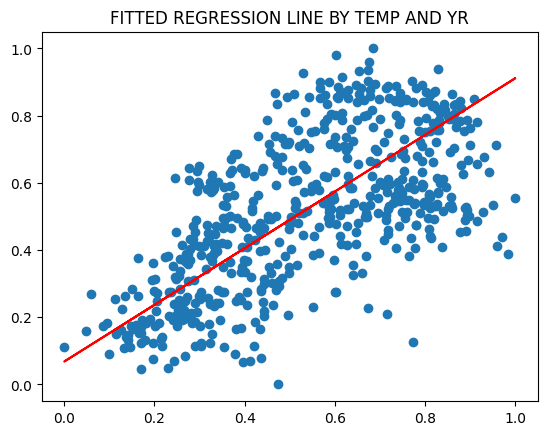

In [58]:
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.0683 + (0.6098 + 0.2332)*X_train_sm.iloc[:, 1],  'r')
plt.title('FITTED REGRESSION LINE BY TEMP AND YR')
plt.show()

# # ALL VARIABLE MODEL

In [59]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [60]:
X_train_sm = sm.add_constant(X_train)

In [61]:
lr = sm.OLS(y_train, X_train_sm)

In [62]:
lr_model = lr.fit()

In [63]:
lr_model.params

const            0.241453
yr               0.229189
holiday          0.008135
workingday       0.099964
temp             0.448013
hum             -0.143536
windspeed       -0.181640
Aug              0.016600
Dec             -0.052090
Feb             -0.028861
Jan             -0.059194
July            -0.035010
June             0.009032
Mar              0.002594
May              0.017965
Nov             -0.050449
Oct              0.012846
Sep              0.076986
Mon             -0.024021
Sat              0.096953
Sun              0.036400
Thu             -0.009520
Tue             -0.022671
Wed             -0.007090
Light Snow      -0.263616
Mist + Cloudy   -0.059263
spring          -0.055823
summer           0.042038
winter           0.108931
dtype: float64

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.29e-216
Time:                        12:12:53   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2415      0.033      7.329      0.000       0.177       0.306
yr                0.2292      0.007     31.107      0.000       0.215       0.244
holiday           0.0081      0.021      0.379      0.704      -0.034       0.050
workingday        0.1000      0.011      8.833      0.000       0.078       0.122
temp              0.4480      0.042     10.610      0.000       0.365       0.531
hum              -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed        -0.1816      0.024     -7.654      0.000      -0.228      -0.135
Aug               0.0166      0.031      0.539      0.590      -0.044       0.077
Dec              -0.0521      0.031     -1.696      0.090      -0.112       0.008
Feb              -0.0289      0.030     -0.952      0.342      -0.088       0.031
Jan              -0.0592      0.031     -1.893      0.059      -0.121       0.002
July             -0.0350      0.032     -1.095      0.274      -0.098       0.028
June              0.0090      0.022      0.404      0.686      -0.035       0.053
Mar               0.0026      0.023      0.111      0.912      -0.043       0.049
May               0.0180      0.019      0.937      0.349      -0.020       0.056
Nov              -0.0504      0.033     -1.512      0.131      -0.116       0.015
Oct               0.0128      0.032      0.396      0.692      -0.051       0.076
Sep               0.0770      0.029      2.635      0.009       0.020       0.134
Mon              -0.0240      0.014     -1.697      0.090      -0.052       0.004
Sat               0.0970      0.013      7.685      0.000       0.072       0.122
Sun               0.0364      0.013      2.895      0.004       0.012       0.061
Thu              -0.0095      0.014     -0.667      0.505      -0.038       0.019
Tue              -0.0227      0.014     -1.589      0.113      -0.051       0.005
Wed              -0.0071      0.014     -0.511      0.610      -0.034       0.020
Light Snow       -0.2636      0.025    -10.548      0.000      -0.313      -0.215
Mist + Cloudy    -0.0593      0.010     -6.144      0.000      -0.078      -0.040
spring           -0.0558      0.027     -2.051      0.041      -0.109      -0.002
summer            0.0420      0.024      1.750      0.081      -0.005       0.089
winter            0.1089      0.025      4.420      0.000       0.061       0.157
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                     9.55e+15
================================================================

INFERENCE
WITH ALL VARIABLE MODEL THE R-squared has increased to 0.859 that measn 85.9% of the variance in the count quantity is explained with all the variables

# AUTOMATED APPROACH 

In [65]:
len(df.columns)

16

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
rfe = RFE(lm, n_features_to_select = 15) 

In [69]:
rfe = rfe.fit(X_train, y_train)

In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', False, 2),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1)]

In [71]:
true_rfe = X_train.columns[rfe.support_]

In [72]:
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan',
       'July', 'Nov', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'winter'],
      dtype='object')

In [73]:
len(true_rfe)

15

In [74]:
X_train_rfe = X_train[true_rfe]

In [75]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [76]:
lr = sm.OLS(y_train, X_train_rfe)

In [77]:
lr_model = lr.fit()

In [78]:
lr_model.params

const            0.315545
yr               0.228912
holiday         -0.043593
workingday       0.050966
temp             0.445792
hum             -0.129521
windspeed       -0.183773
Dec             -0.060401
Jan             -0.049962
July            -0.078662
Nov             -0.068834
Sat              0.061303
Light Snow      -0.263444
Mist + Cloudy   -0.059698
spring          -0.110529
winter           0.081689
dtype: float64

In [79]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.02e-223
Time:                        12:12:54   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3155      0.031     10.212      0.000       0.255       0.376
yr                0.2289      0.007     30.876      0.000       0.214       0.243
holiday          -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday        0.0510      0.010      4.920      0.000       0.031       0.071
temp              0.4458      0.031     14.594      0.000       0.386       0.506
hum              -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed        -0.1838      0.024     -7.763      0.000      -0.230      -0.137
Dec              -0.0604      0.015     -3.937      0.000      -0.091      -0.030
Jan              -0.0500      0.016     -3.056      0.002      -0.082      -0.018
July             -0.0787      0.016     -5.030      0.000      -0.109      -0.048
Nov              -0.0688      0.017     -4.041      0.000      -0.102      -0.035
Sat               0.0613      0.013      4.618      0.000       0.035       0.087
Light Snow       -0.2634      0.025    -10.534      0.000      -0.313      -0.214
Mist + Cloudy    -0.0597      0.010     -6.135      0.000      -0.079      -0.041
spring           -0.1105      0.014     -7.800      0.000      -0.138      -0.083
winter            0.0817      0.012      6.557      0.000       0.057       0.106
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [81]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
4             hum  25.87
3            temp  18.12
2      workingday   5.01
5       windspeed   4.25
13         spring   3.06
14         winter   2.77
12  Mist + Cloudy   2.29
0              yr   2.08
10            Sat   1.90
7             Jan   1.71
9             Nov   1.71
6             Dec   1.52
8            July   1.38
11     Light Snow   1.23
1         holiday   1.19

In [82]:
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [83]:
X_train_lr1 = sm.add_constant(X_train_new_1)

In [84]:
lr = sm.OLS(y_train, X_train_lr1)

In [85]:
lr_model = lr.fit()

In [86]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.78e-219
Time:                        12:12:54   Log-Likelihood:                 586.15
No. Observations:                 584   AIC:                            -1142.
Df Residuals:                     569   BIC:                            -1077.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3563      0.030     11.732      0.000       0.297       0.416
yr                0.2292      0.008     30.311      0.000       0.214       0.244
holiday          -0.0844      0.023     -3.650      0.000      -0.130      -0.039
temp              0.4533      0.031     14.565      0.000       0.392       0.514
hum              -0.1376      0.036     -3.828      0.000      -0.208      -0.067
windspeed        -0.1832      0.024     -7.584      0.000      -0.231      -0.136
Dec              -0.0582      0.016     -3.717      0.000      -0.089      -0.027
Jan              -0.0482      0.017     -2.893      0.004      -0.081      -0.015
July             -0.0819      0.016     -5.140      0.000      -0.113      -0.051
Nov              -0.0688      0.017     -3.959      0.000      -0.103      -0.035
Sat               0.0198      0.010      1.894      0.059      -0.001       0.040
Light Snow       -0.2553      0.025    -10.027      0.000      -0.305      -0.205
Mist + Cloudy    -0.0561      0.010     -5.672      0.000      -0.076      -0.037
spring           -0.1106      0.014     -7.652      0.000      -0.139      -0.082
winter            0.0817      0.013      6.426      0.000       0.057       0.107
==============================================================================
Omnibus:                       94.899   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.997
Skew:                          -0.821   Prob(JB):                     1.41e-54
Kurtosis:                       5.738   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
lr = sm.OLS(y_train, X_train_lr1)
lr_model = lr.fit()

In [88]:
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [89]:
lr_model.summary()
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3             hum  25.25
2            temp  17.27
4       windspeed   4.15
12         spring   3.00
13         winter   2.76
11  Mist + Cloudy   2.29
0              yr   2.08
6             Jan   1.71
8             Nov   1.71
5             Dec   1.51
7            July   1.38
10     Light Snow   1.23
9             Sat   1.19
1         holiday   1.06

### DROPPING VARIABLES WITH LOW VIF AND HIGH P VALUE

In [90]:
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [91]:
X_train_lr2 = sm.add_constant(X_train_new_2)

In [92]:
lr = sm.OLS(y_train, X_train_lr2)

In [93]:
lr_model = lr.fit()

In [94]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.74e-220
Time:                        12:12:54   Log-Likelihood:                 584.31
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     570   BIC:                            -1079.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3604      0.030     11.872      0.000       0.301       0.420
yr                0.2286      0.008     30.189      0.000       0.214       0.244
holiday          -0.0875      0.023     -3.784      0.000      -0.133      -0.042
temp              0.4535      0.031     14.537      0.000       0.392       0.515
hum              -0.1402      0.036     -3.895      0.000      -0.211      -0.070
windspeed        -0.1814      0.024     -7.498      0.000      -0.229      -0.134
Dec              -0.0575      0.016     -3.666      0.000      -0.088      -0.027
Jan              -0.0479      0.017     -2.866      0.004      -0.081      -0.015
July             -0.0816      0.016     -5.107      0.000      -0.113      -0.050
Nov              -0.0692      0.017     -3.974      0.000      -0.103      -0.035
Light Snow       -0.2542      0.026     -9.965      0.000      -0.304      -0.204
Mist + Cloudy    -0.0557      0.010     -5.618      0.000      -0.075      -0.036
spring           -0.1107      0.014     -7.642      0.000      -0.139      -0.082
winter            0.0819      0.013      6.433      0.000       0.057       0.107
==============================================================================
Omnibus:                       88.557   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.465
Skew:                          -0.755   Prob(JB):                     3.69e-53
Kurtosis:                       5.765   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [96]:
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3             hum  25.25
2            temp  17.23
4       windspeed   4.11
11         spring   3.00
12         winter   2.76
10  Mist + Cloudy   2.29
0              yr   2.07
8             Nov   1.71
6             Jan   1.70
5             Dec   1.51
7            July   1.38
9      Light Snow   1.23
1         holiday   1.05

In [97]:
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [98]:
X_train_lr3 = sm.add_constant(X_train_new_3)

In [99]:
lr_model = lr.fit()

In [100]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.74e-220
Time:                        12:12:54   Log-Likelihood:                 584.31
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     570   BIC:                            -1079.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3604      0.030     11.872      0.000       0.301       0.420
yr                0.2286      0.008     30.189      0.000       0.214       0.244
holiday          -0.0875      0.023     -3.784      0.000      -0.133      -0.042
temp              0.4535      0.031     14.537      0.000       0.392       0.515
hum              -0.1402      0.036     -3.895      0.000      -0.211      -0.070
windspeed        -0.1814      0.024     -7.498      0.000      -0.229      -0.134
Dec              -0.0575      0.016     -3.666      0.000      -0.088      -0.027
Jan              -0.0479      0.017     -2.866      0.004      -0.081      -0.015
July             -0.0816      0.016     -5.107      0.000      -0.113      -0.050
Nov              -0.0692      0.017     -3.974      0.000      -0.103      -0.035
Light Snow       -0.2542      0.026     -9.965      0.000      -0.304      -0.204
Mist + Cloudy    -0.0557      0.010     -5.618      0.000      -0.075      -0.036
spring           -0.1107      0.014     -7.642      0.000      -0.139      -0.082
winter            0.0819      0.013      6.433      0.000       0.057       0.107
==============================================================================
Omnibus:                       88.557   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.465
Skew:                          -0.755   Prob(JB):                     3.69e-53
Kurtosis:                       5.765   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [102]:
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2            temp  4.35
3       windspeed  4.10
10         spring  2.35
11         winter  2.35
0              yr  2.07
7             Nov  1.67
5             Jan  1.61
9   Mist + Cloudy  1.52
4             Dec  1.41
6            July  1.32
8      Light Snow  1.07
1         holiday  1.05

In [103]:
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

In [104]:
lr = sm.OLS(y_train, X_train_lr3)

In [105]:
lr_model = lr.fit()

In [106]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1439.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        12:12:54   Log-Likelihood:                          511.62
No. Observations:                 584   AIC:                                     -999.2
Df Residuals:                     572   BIC:                                     -946.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2400      0.008     28.399      0.000       0.223       0.257
holiday          -0.0938      0.026     -3.588      0.000      -0.145      -0.042
temp              0.7510      0.015     49.773      0.000       0.721       0.781
windspeed        -0.0327      0.024     -1.384      0.167      -0.079       0.014
Dec              -0.0110      0.017     -0.647      0.518      -0.044       0.022
Jan               0.0031      0.018      0.171      0.864      -0.032       0.039
July             -0.1097      0.018     -6.228      0.000      -0.144      -0.075
Nov              -0.0237      0.019     -1.234      0.218      -0.061       0.014
Light Snow       -0.2791      0.026    -10.588      0.000      -0.331      -0.227
Mist + Cloudy    -0.0589      0.009     -6.627      0.000      -0.076      -0.041
spring           -0.0047      0.013     -0.368      0.713      -0.030       0.021
winter            0.1389      0.013     10.747      0.000       0.114       0.164
==============================================================================
Omnibus:                       63.951   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.788
Skew:                          -0.666   Prob(JB):                     5.91e-27
Kurtosis:                       4.786   Cond. No.                         6.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2            temp  2.74
10         winter  2.34
0              yr  2.06
9          spring  1.92
6             Nov  1.65
4             Jan  1.61
8   Mist + Cloudy  1.52
3             Dec  1.41
5            July  1.30
1         holiday  1.05
7      Light Snow  1.05

In [108]:
X_train_new_5 = X_train_lr3.drop(['July'], axis = 1)

In [109]:
X_train_lr5 = sm.add_constant(X_train_new_5)

In [110]:
lr = sm.OLS(y_train, X_train_lr5)

In [111]:
lr_model = lr.fit()

In [112]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     260.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.42e-214
Time:                        12:12:54   Log-Likelihood:                 565.99
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     572   BIC:                            -1056.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3073      0.024     12.797      0.000       0.260       0.354
yr                0.2334      0.008     30.206      0.000       0.218       0.249
holiday          -0.0874      0.024     -3.670      0.000      -0.134      -0.041
temp              0.3750      0.029     12.825      0.000       0.318       0.432
windspeed        -0.1533      0.024     -6.404      0.000      -0.200      -0.106
Dec              -0.0705      0.016     -4.405      0.000      -0.102      -0.039
Jan              -0.0604      0.017     -3.533      0.000      -0.094      -0.027
Nov              -0.0761      0.018     -4.259      0.000      -0.111      -0.041
Light Snow       -0.2966      0.024    -12.333      0.000      -0.344      -0.249
Mist + Cloudy    -0.0751      0.008     -9.120      0.000      -0.091      -0.059
spring           -0.1179      0.015     -7.925      0.000      -0.147      -0.089
winter            0.0779      0.013      6.011      0.000       0.052       0.103
==============================================================================
Omnibus:                       98.935   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.640
Skew:                          -0.829   Prob(JB):                     3.12e-61
Kurtosis:                       5.950   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [114]:
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
3       windspeed  4.05
2            temp  3.64
9          spring  2.34
10         winter  2.30
0              yr  2.07
6             Nov  1.67
5             Jan  1.61
8   Mist + Cloudy  1.50
4             Dec  1.41
7      Light Snow  1.07
1         holiday  1.05

##INFERENCES

THERE ARE FEW FACTORS WHICH GOVERNS MODEL 
P VALUE>>>  SHOULD BE < 0.05 FOR REJECTING NULL HYPOTHESIS
VIF >>> SHOULD BE <5 AND IT IS THE COORELATION BETWEEN PARTICIPATING VARIABLES AND R-SQUARED
R-SUARED >>> CORRELATION BETWEEN DEPENDENT AND INDEPENDENT VARIABLE 

#### RESIDUAL ANALYSIS

In [115]:
X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

const  yr  holiday      temp  windspeed  Dec  Jan  Nov  Light Snow  \
367    1.0   1        0  0.113228   0.695175    0    1    0           0   
648    1.0   1        0  0.468352   0.299450    0    0    0           0   
44     1.0   0        0  0.443431   0.807474    0    0    0           0   
705    1.0   1        0  0.326094   0.189819    1    0    0           0   
379    1.0   1        0  0.133996   0.449210    0    1    0           0   
..     ...  ..      ...       ...        ...  ...  ...  ...         ...   
578    1.0   1        0  0.863973   0.187140    0    0    0           0   
53     1.0   0        0  0.202618   0.111379    0    0    0           0   
350    1.0   0        0  0.248216   0.431816    1    0    0           0   
79     1.0   0        0  0.462664   0.529881    0    0    0           0   
520    1.0   1        0  0.600225   0.359599    0    0    0           0   

     Mist + Cloudy  spring  winter  
367              0       1       0  
648              0       0       1  
44               0       1       0  
705              1       0       1  
379              0       1       0  
..             ...     ...     ...  
578              0       0       0  
53               0       1       0  
350              1       0       1  
79               1       0       0  
520              1       0       0  

[584 rows x 12 columns]

GETTING THE y_tran_pred for residual analysis

In [116]:
y_train_pred = lr_model.predict(X_train_lr5)

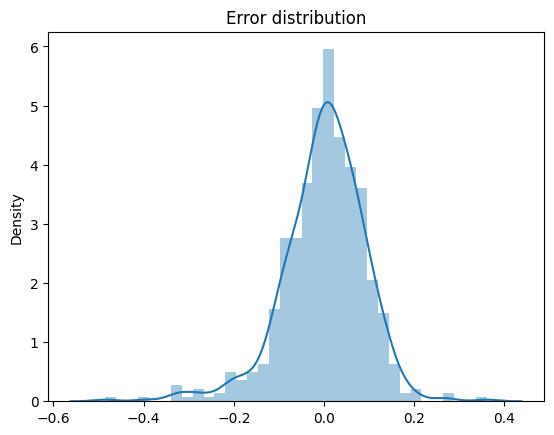

In [117]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error distribution')
plt.show()

NOTE: distribution should be centered around 0 and should be a normal distribution

STANDARIZATION AND SCALING OF VARIABLES

In [118]:
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [119]:
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [120]:
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.445205    0.034247    0.746575    0.569603    0.635933    0.315127   
std      0.498699    0.182488    0.436469    0.238088    0.156357    0.161524   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.250000    0.359075    0.534457    0.196160   
50%      0.000000    0.000000    1.000000    0.560248    0.614856    0.306383   
75%      1.000000    0.000000    1.000000    0.801929    0.730570    0.411976   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.800793   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  146.000000  146.000000  146.000000  146.000000  ...  146.000000   
mean     0.517368    0.061644    0.075342    0.089041  ...    0.116438   
std      0.212757    0.241335    0.264852    0.285783  ...    0.321854   
min      0.055683    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.391251    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.508916    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.649994    0.000000    0.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow  \
count  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.102740    0.171233    0.178082    0.089041    0.034247   
std      0.304664    0.378009    0.383899    0.285783    0.182488   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy      spring      summer      winter  
count     146.000000  146.000000  146.000000  146.000000  
mean        0.315068    0.226027    0.273973    0.219178  
std         0.466142    0.419697    0.447530    0.415114  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    1.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

BUILDING TEST MODEL FOR VARIABLE temp
PREPARATION OF VARIABLE FOR MODEL BUILDING

In [121]:
y_test = df_test.pop('cnt')
X_test = df_test

LETS HAVE A LOOK ON VALUES

In [122]:
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [123]:
X_test.head(5)

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
184   0        1           0  0.831783  0.657364   0.084219    0    0    0   
535   1        0           1  0.901354  0.610133   0.153728    0    0    0   
299   0        0           1  0.511964  0.837699   0.334206    0    0    0   
221   0        0           1  0.881625  0.437098   0.339570    1    0    0   
152   0        0           1  0.817246  0.314298   0.537414    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
184    0  ...    0    0    0    0    0           0              1       0   
535    0  ...    0    0    0    0    1           0              0       0   
299    0  ...    0    0    1    0    0           0              1       0   
221    0  ...    0    0    0    0    1           0              0       0   
152    0  ...    0    0    1    0    0           0              0       0   

     summer  winter  
184       0       0  
535       1       0  
299       0       1  
221       0       0  
152       1       0  

[5 rows x 28 columns]

PRINT FEATURE VARIABLES

In [124]:
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Jan', 'Nov',
       'Light Snow', 'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

DROP CONSTANT

In [125]:
X_train_lr5.drop(columns= 'const', inplace = True)

CREATE NEW TEST SET X  >>>  X_text_new (it is based on the features variables using RFE)

In [126]:
X_test_new = X_test[X_train_lr5.columns]


ADD CONSTANT VARAIBLE

In [127]:
X_test_new = sm.add_constant(X_test_new)

In [128]:
y_pred = lr_model.predict(X_test_new)

# INFERENCES
### TEMPERATURE  temp HAS LINEAR RELATIONSHIP WITH COUNT cnt
### Chosen variables have VIF <5 MEAN NO MULTICOLINEARITY 
### THE ERROR DISTRIBUTION IS CENTERED AROUND 0


# MODEL EVALUATION

R2 OF TEST SET
LETS RUN THE REQUIRED CODE CHUNCK

In [129]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# where y_test is the test data set for the target variable,
# and y_pred is the variable containing the predicted values of the target variable on the test set.

0.7824087111518871

In [130]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8337306325703249


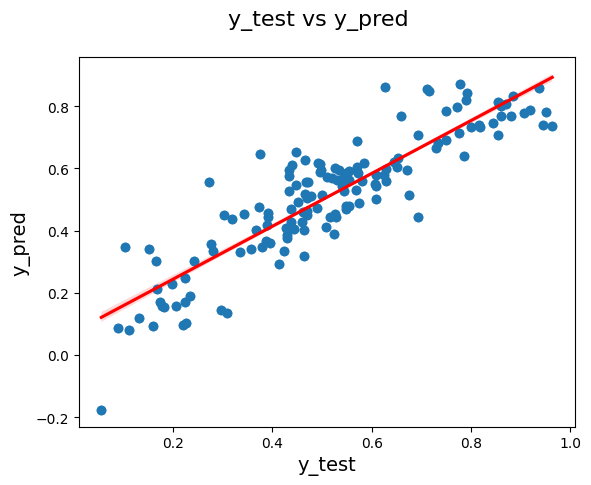

In [131]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [132]:
MEAN SQUARED ERROR

SyntaxError: invalid syntax (2968853677.py, line 1)

In [ ]:
train_mse = (mean_squared_error(y_train, y_train_pred))
test_mse = (mean_squared_error(y_test, y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

# KEY CONCLUSIONS

BOTH TEST AND TRAIN DATASET MEAN SQUARED ERROR IS NEAR TO 0 SUGGEST THE ACCURACY OF MODEL
SIGNIFICANT VARIABLES ARE PRIDICTED BASED ON p-value and VIF
AUTOMATED SELECTION OF VARIABLES WAS DONE BY RFE


BIKE DEMAND IS LARGELY DEPENDS ON WEATHER AND TEMPERATURE
MORE BIKE RENTAL IN WINTER COMPARED WITH SUMMAR AND SPRING
HIGH RENTAL IN SEPTERMBER AND OCTOBER
MORE RENTAL ON WEDNESDAY, THRUSDAY AND SATURDAY 
MORE RENTAL ON HOLIDAYS


BUSINESS RECOMMENDATION

COMPANY SHOULD FOCUS ON MARKETING IN SUMMAR AND SPRING
INTRODUCE MORE USERS OR DECREASE RENTAL PRICE IN SUMMAR AND SPRING
MORE RENTAL OCCURED IN 2019, SO PEOPLE ARE TAKING IDEA AHEAD AND THESE CUSTOMERS SHOULD BE RETAINED 

In [ ]:
CREDITS
UPGRAD TEACHERS AND FELLOW LEARNERS
